In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from datetime import datetime, timedelta 
import statsmodels
import operator
import os
from tqdm import tqdm
import copy

plt.style.use('seaborn-darkgrid')
# 3 is nothing #000000
colors = ['#34495e','#2ecc71','#3498db', '#000000', '#FFFF00', '#e74c3c','#a9a9a9']
sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [5]:
filepath   = '../data/'
filename01 = 'captain_iaq_meta_201805.csv'
filename02 = 'captain_airprfr_sttus_201805.csv'
outputpath = './'

In [13]:
%%time
data = pd.read_csv(filepath + filename01, parse_dates=['dev_dt', 'dt', 'invnr', 'inbdt', 'apts_in_date', 'rtn_conf_dt'])

CPU times: user 6min 48s, sys: 16.4 s, total: 7min 4s
Wall time: 7min 4s


In [14]:
%%time
status = pd.read_csv(filepath + filename02, parse_dates=['dev_dt', 'dt'])

CPU times: user 544 ms, sys: 0 ns, total: 544 ms
Wall time: 544 ms


In [15]:
%%time
result = pd.merge(data, status, on = ['dev_id', 'dev_dt'], how = 'outer', sort=True)

CPU times: user 4min 14s, sys: 7.97 s, total: 4min 22s
Wall time: 4min 22s


In [31]:
names = result['dev_id'].unique().tolist()

In [ ]:
%%time
result['week_no'] = [pd.datetime.isocalendar(result.loc[n, 'dev_dt'])[1] for n in range(len(result))]
result['weekday'] = [pd.datetime.isocalendar(result.loc[n, 'dev_dt'])[2] for n in range(len(result))]

In [ ]:
result.loc[(result['mode_stng'] == 0) & (result['fan_speed_adj'] == 0),  ['fan_speed_adj']] = np.nan
result.loc[result['mode_stng'] == 2, ['fan_speed_adj']] = 0.5
result.loc[result['mode_stng'] == 4, ['fan_speed_adj']] = 0
result.loc[result['mode_stng'] == 5, ['fan_speed_adj']] = 3

In [33]:
%%time
device_data = [result.loc[result['dev_id'] == n] for n in tqdm(names)]

100%|██████████| 1863/1863 [1:45:44<00:00,  3.41s/it]

CPU times: user 1h 45min 50s, sys: 5.65 s, total: 1h 45min 55s
Wall time: 1h 45min 44s


In [ ]:
target_ffill = ['pwr_stng', 'mode_stng', 'fan_speed_adj', 'oaq_idx', 'ventil_alrm']

In [ ]:
%%time
device_data = [result[result['dev_id'] == name] for name in names]
[d.reset_index(inplace=True) for d in tqdm(device_data)]
[d.drop('index', axis=1, inplace=True) for d in tqdm(device_data)]

In [ ]:
%%time 
for d in tqdm(device_dataa):
    d.reset_index(inplace=True, drop=True)
    
    
[device_data[n][name].fillna(method='ffill', inplace=True) for n in range(len(selected_devices)) for name in target_ffill]
[device_data[n]['mode_stng'].fillna(value=0, inplace=True) for n in range(len(selected_devices))]

In [34]:
result.columns

Index(['dev_id', 'dev_dt', 'pm25', 'pm10', 'voc_ref', 'voc_now', 'humi',
       'temp', 'lux', 'co2', 'pm10_idx', 'pm25_idx', 'vocs_idx', 'co2_idx',
       'iaq_idx_x', 'unpl_idx', 'polt_idx', 'dt_x', 'invnr', 'inbdt',
       'use_cust_id', 'pyn', 'room_cnt', 'do_nm', 'ct_nm', 'gu_nm', 'dng_nm',
       'apts_in_date', 'bldg_tp', 'rtn_conf_dt', 'age', 'sex', 'cust_tpnm',
       'pwr_stng', 'mode_stng', 'fan_speed_adj', 'light_stng', 'eco_mode_stng',
       'iaq_idx_y', 'oaq_idx', 'ventil_alrm', 'cover_alrm_l', 'cover_alrm_r',
       'dt_y'],
      dtype='object')

In [39]:
gangnam_device = result[result['ct_nm'] == '강남구']['dev_id'].unique().tolist()

In [40]:
%%time
gangnam_data = result[np.isin(result['dev_id'], gangnam_device)]

CPU times: user 15min 10s, sys: 1.65 s, total: 15min 12s
Wall time: 15min 11s


In [45]:
%%time
gangnam_data.to_csv(filepath + 'gangnam.csv', index=False)

CPU times: user 3h 25min 41s, sys: 33min 12s, total: 3h 58min 53s
Wall time: 3h 58min 53s


In [47]:
## 그래프용
colors = ['#34495e','#2ecc71','#3498db','#FFFF00', '#e74c3c','#a9a9a9']
s_list = pd.date_range(pd.to_datetime('2018-05-01', format='%Y-%m-%d %H:%M:%S.%f'), periods=31).tolist()
e_list = pd.date_range(pd.to_datetime('2018-05-02', format='%Y-%m-%d %H:%M:%S.%f'), periods=31).tolist()
sns.set(style="ticks", color_codes=True)
plt.style.use('seaborn-darkgrid')

## 파일위치
filepath   = '../data/'
filename = 'processed_whole_data.csv'
outputpath = './'

In [48]:
## 전처리 완료된 data load
## shape (None, 44)
## columns = ['dev_id', 'dev_dt', 'pm25', 'pm10', 'voc_ref', 'voc_now', 'humi', 'temp', 'lux', 'co2', 'pm10_idx', 'pm25_idx', 'vocs_idx', 'co2_idx', 'iaq_idx_x', 'unpl_idx', 'polt_idx', 'dt_x', 'invnr', 'inbdt', 'use_cust_id', 'pyn', 'room_cnt', 'do_nm', 'ct_nm', 'gu_nm', 'dng_nm', 'apts_in_date', 'bldg_tp', 'rtn_conf_dt', 'age', 'sex', 'cust_tpnm', 'pwr_stng', 'mode_stng', 'fan_speed_adj', 'light_stng', 'eco_mode_stng', 'iaq_idx_y', 'oaq_idx', 'ventil_alrm', 'cover_alrm_l', 'cover_alrm_r', 'dt_y']
# case_III_raw = pd.read_csv(filepath + 'processed_whole_data.csv', parse_dates=['dev_dt'])
case_III_raw = result.copy()

## 전체 데이터 비율확인용 변수
names = case_III_raw['dev_id'].unique()
names.sort

<function ndarray.sort>

In [49]:
len(names)

1863

In [55]:
%%time
case_III_raw['day'] = list(map(lambda x: x.day, case_III_raw['dev_dt']))

CPU times: user 2min 21s, sys: 932 ms, total: 2min 22s
Wall time: 2min 22s


In [57]:
%%time
for d in tqdm(device_data):
    d['day'] = list(map(lambda x: x.day, d['dev_dt']))

  0%|          | 0/1863 [00:00<?, ?it/s]/home/roki/.virtualenvs/coway_cp36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
100%|██████████| 1863/1863 [05:50<00:00,  5.74it/s]

CPU times: user 5min 50s, sys: 668 ms, total: 5min 50s
Wall time: 5min 50s


In [ ]:
## case III pm10이 특정값 들로만 센싱되는 경우
# - target device '16302D8F15B1300011'
# - 하루 기준 pm10 최빈값 5개의 비율이 80%를 이루는 일이 device별 7일 이상인 device들 중에서
#     - PM10=0이 최빈값인 경우
#     - 나머지

## 디바이스별 데이터 생성
device_data = [case_III_raw[case_III_raw['dev_id'] == name] for name in tqdm(names)]

In [58]:
%%time
## 띠가 형성되는 device 검출
## 각 디바이스별/일별 top 5 최빈값 비율 측정
case_III_counting_result = [pd.pivot_table(d, index='pm10', columns='day', values='dev_dt', aggfunc=lambda x: len(x.unique()), dropna=True) for d in tqdm(device_data)]

CPU times: user 9min 58s, sys: 5.19 s, total: 10min 3s
Wall time: 9min 58s


In [59]:
%%time
det_count = lambda x: [x.loc[:, v].nlargest(5).values for v in x.columns.values]
case_III_counting_top5 = [np.array(list(map(sum, det_count(d)))) / d.T.apply(lambda x:x.sum(), axis=1).values for d in tqdm(case_III_counting_result)]

100%|██████████| 1863/1863 [00:31<00:00, 58.59it/s]

CPU times: user 31.8 s, sys: 628 ms, total: 32.4 s
Wall time: 31.8 s


In [60]:
## 최빈값 5개가 일기준 80% 이상
## 이러한 날이 7일 이상인
rate_03 = 0.80
days_03 = 7

In [61]:
## 해당 디바이스의 최빈값 10개의 그래프
test_case = case_III_raw.groupby(['dev_id'])['pm10'].apply(lambda x: x.value_counts().iloc[:10])
test_case = test_case.reset_index(level=1, name='count')
test_case.reset_index(inplace=True)

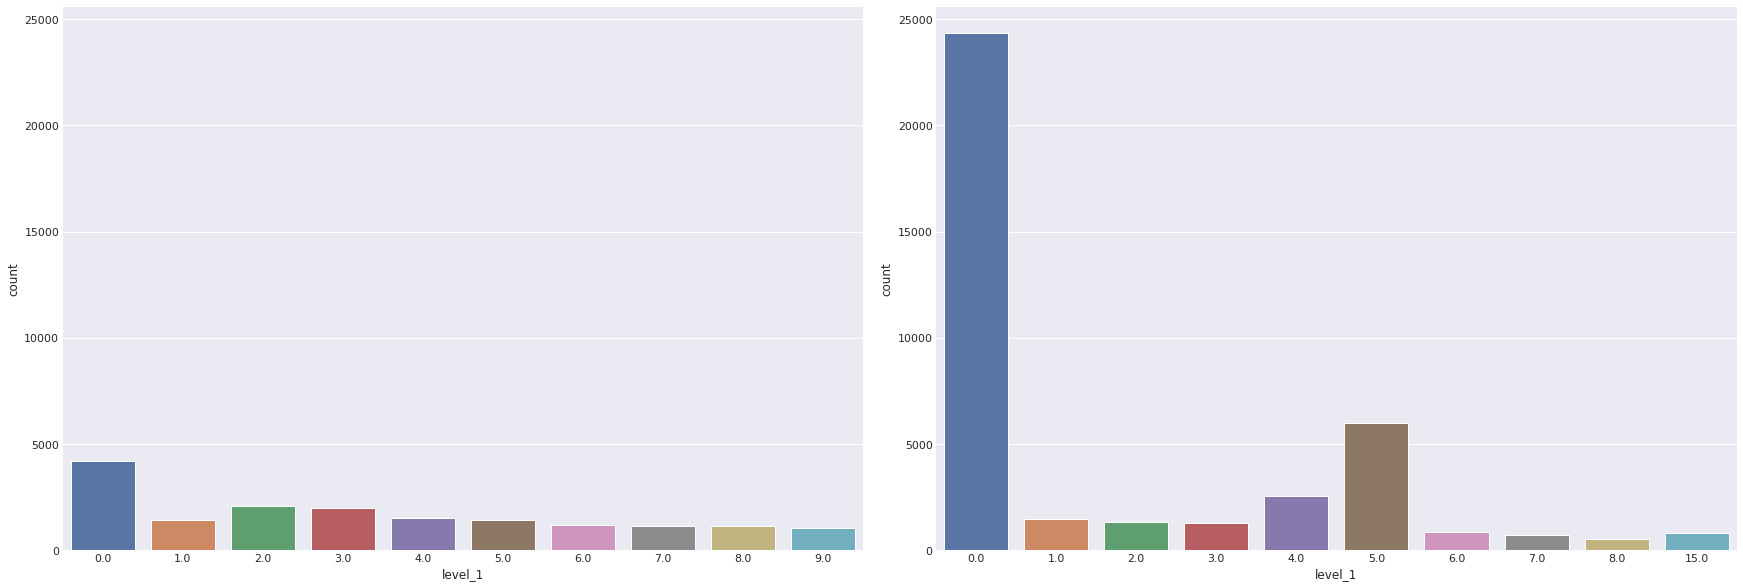

In [63]:
target_data1 = test_case.loc[test_case['dev_id'] == '19202ER01672200035']
target_data2 = test_case.loc[test_case['dev_id'] == '16102D8F15C2200049']
fig = plt.figure(figsize=(30,10))
ax01 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=2)
sns.barplot(x='level_1', y='count', data = target_data1)
ax02 = plt.subplot2grid((2,4), (0,2), colspan=2, rowspan=2, sharey=ax01)
sns.barplot(x='level_1', y='count', data = target_data2)

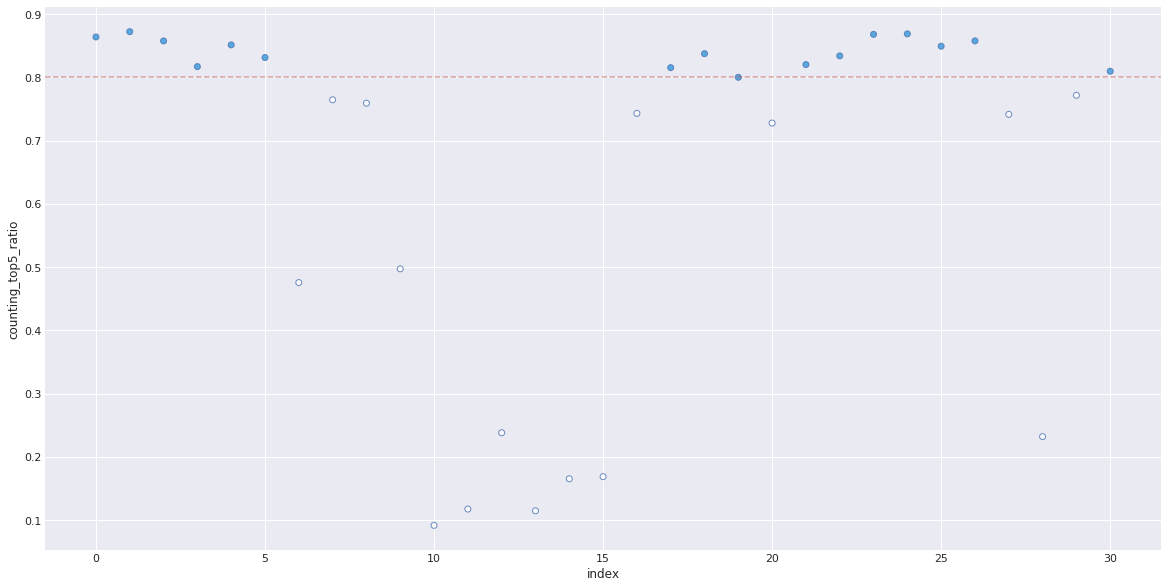

In [64]:
## 특정 device 검증
## eye-check기준의 cut-off설정
target_data = pd.DataFrame(case_III_counting_top5[513], columns=['counting_top5_ratio'])
target_data.reset_index(inplace=True)
target_data['color'] = np.where(target_data['counting_top5_ratio'] > rate_03 , "#3498db", "#FFFFFF")
fig = plt.figure(figsize=(20,10))
sns.regplot(x='index', y='counting_top5_ratio', data=target_data, fit_reg=False, scatter_kws={'facecolors':target_data['color']})
plt.axhline(0.8, color='r', linestyle='--', alpha=0.5)

In [65]:
## 일수 확인
case_III_counting_days = [np.sum(d > rate_03) for d in tqdm(case_III_counting_top5)]
case_III_result = pd.concat([pd.Series(names, name='dev_id'), pd.Series(case_III_counting_days, name='days')], axis=1)
case_III_target = case_III_result.loc[case_III_result['days'] > days_03, : ].sort_values('days', ascending=False)

100%|██████████| 1863/1863 [00:00<00:00, 163383.69it/s]


In [66]:
## 띠가 형성된 device 목록
case_III_names = case_III_target['dev_id'].unique().tolist()

In [67]:
## 해당 case 디바이스 최빈값 5개와 count
case_III_devices = case_III_raw.loc[case_III_raw['dev_id'].isin(case_III_names)].copy()
case_III_devices_result = case_III_devices.groupby(['dev_id'])['pm10'].apply(lambda x: x.value_counts().iloc[:5])
case_III_devices_result = case_III_devices_result.reset_index(level=1, name='count')
case_III_devices_result.reset_index(inplace=True)

In [68]:
## 특정 디바이스의 일별 최빈값 5 확인
case_III_devices_result.loc[case_III_devices_result['dev_id'] == '16102D8F15C0900113']

,dev_id,level_1,count
55,16102D8F15C0900113,0.0,34501
56,16102D8F15C0900113,13.0,1374
57,16102D8F15C0900113,1.0,834
58,16102D8F15C0900113,2.0,754
59,16102D8F15C0900113,3.0,485


In [69]:
## PM10 최빈값이 0 케이스 검출
# - 정상데이터(하루 1440건 * 31일 기준 44640)을 기준으로 15000건 이상 PM10이 차지할 경우
det_pm10_most = lambda x, y: (x == 0) & (y > 15000)
case_III_pm10 = case_III_devices_result.loc[det_pm10_most(case_III_devices_result['level_1'], case_III_devices_result['count']), :]

In [72]:
case_III_pm10.sort_values(by='count', ascending=False)

,dev_id,level_1,count
210,17402D8F16B2100023,0.0,37690
290,19302D8F1711700041,0.0,36812
5,15902D8F1611100600,0.0,36493
50,16102D8F15C0900064,0.0,36456
270,19302D8F16C2300299,0.0,36285
320,19302ETJ1731700187,0.0,35569
275,19302D8F16C2600054,0.0,34780
335,19402D8F1752600016,0.0,34576
55,16102D8F15C0900113,0.0,34501
20,15902D8F1622300269,0.0,31451


In [70]:
## 컴출 디바이스 갯수와 비율 확인
print(len(case_III_pm10), len(case_III_pm10) / len(names))

60 0.0322061191626409


In [74]:
target = case_III_pm10['dev_id'].unique().tolist()

In [76]:
result.columns

Index(['dev_id', 'dev_dt', 'pm25', 'pm10', 'voc_ref', 'voc_now', 'humi',
       'temp', 'lux', 'co2', 'pm10_idx', 'pm25_idx', 'vocs_idx', 'co2_idx',
       'iaq_idx_x', 'unpl_idx', 'polt_idx', 'dt_x', 'invnr', 'inbdt',
       'use_cust_id', 'pyn', 'room_cnt', 'do_nm', 'ct_nm', 'gu_nm', 'dng_nm',
       'apts_in_date', 'bldg_tp', 'rtn_conf_dt', 'age', 'sex', 'cust_tpnm',
       'pwr_stng', 'mode_stng', 'fan_speed_adj', 'light_stng', 'eco_mode_stng',
       'iaq_idx_y', 'oaq_idx', 'ventil_alrm', 'cover_alrm_l', 'cover_alrm_r',
       'dt_y'],
      dtype='object')

In [137]:
%%time
inst_result = result[np.isin(result['dev_id'], target)][['dev_id', 'inbdt']]
inst_result.dropna(inplace=True)

In [173]:
%%time
case_III_inst = inst_result.groupby('dev_id')['inbdt'].agg(lambda x: pd.to_datetime(x.unique().tolist()[0]))
case_III_inst = case_III_inst.reset_index()
case_III_cust = result.groupby('dev_id')['cust_tpnm'].agg(lambda x: x.unique().tolist()[0])
case_III_cust = case_III_cust.reset_index()

CPU times: user 10.3 s, sys: 712 ms, total: 11 s
Wall time: 11 s


In [212]:
%%time
case_III_usage = pd.merge(left=case_III_inst, right=case_III_pm10, how='left', on='dev_id')
case_III_usage = pd.merge(left=case_III_usage, right=case_III_cust, how='left', on='dev_id')
case_III_usage['cust_tpnm'].fillna('알수없음', inplace=True)

cust_type = ['알수없음', '개인', '외국인', '개인사업자', '법인사업자']
case_III_usage['cust_type'] = list(map(lambda x: cust_type.index(x), case_III_usage['cust_tpnm']))

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 8.25 ms


In [213]:
%%time
base_day = pd.to_datetime('2019-01-31')
case_III_usage['days'] = list(map(lambda x: (base_day - x).days, case_III_usage['inbdt']))

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.1 ms


In [214]:
from scipy.stats import norm

In [226]:
temp_result = case_III_usage.groupby('cust_type')['days'].mean()
temp_result = temp_result.reset_index()

In [227]:
temp_result

,cust_type,days
0,0,886.666667
1,1,919.553191
2,2,1142.000000
3,3,903.500000
4,4,813.714286


In [249]:
case_III_usage.sort_values(by='days', ascending=False)

,dev_id,inbdt,level_1,count,cust_tpnm,cust_type,days
15,16302D8F15B1300011,2015-11-18,0.0,16230,개인,1,1170
12,16202D8F15B2000155,2015-11-25,0.0,26786,개인,1,1163
20,16402D8F15B2400006,2015-12-03,0.0,26852,개인,1,1155
19,16402D8F15B2000025,2015-12-04,0.0,29978,개인,1,1154
7,16102D8F15B2700109,2015-12-05,0.0,27440,개인,1,1153
21,16402D8F15B2400056,2015-12-07,0.0,30576,개인,1,1151
17,16302D8F15C0400059,2015-12-07,0.0,28679,개인,1,1151
14,16202D8F15C0400051,2015-12-08,0.0,23856,개인,1,1150
9,16102D8F15C0900113,2015-12-16,0.0,34501,외국인,2,1142
18,16302D8F15C1700013,2015-12-23,0.0,26208,개인,1,1135


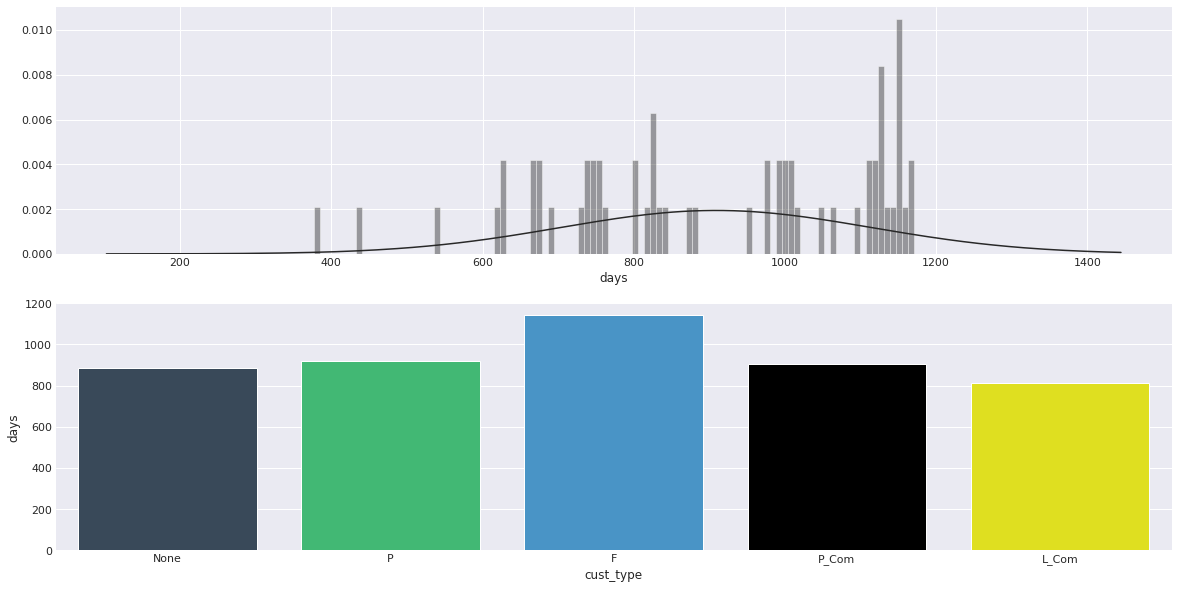

In [250]:
fig = plt.figure(figsize=(20,10))
ax01 = plt.subplot2grid((2,4), (0,0), colspan=4)
sns.distplot(case_III_usage['days'], bins=100, fit=norm, kde=False, color='k')
ax02 = plt.subplot2grid((2,4), (1,0), colspan=4)
sns.barplot(x='cust_type', y='days', data=temp_result)
ax02.xaxis.set_ticklabels(['None', 'P', 'F', 'P_Com', 'L_Com'])
fig.savefig('./case_III_extra.png')

# for graph

In [234]:
i = 17
d = 29
s_date = s_list[d]
e_date = e_list[d]
target_data = device_data[i][device_data[i]['dev_dt'].between(s_date, e_date)].copy()

In [236]:
target_data.fillna(method='ffill', inplace=True)

In [238]:
target_data.reset_index(inplace=True, drop=True)

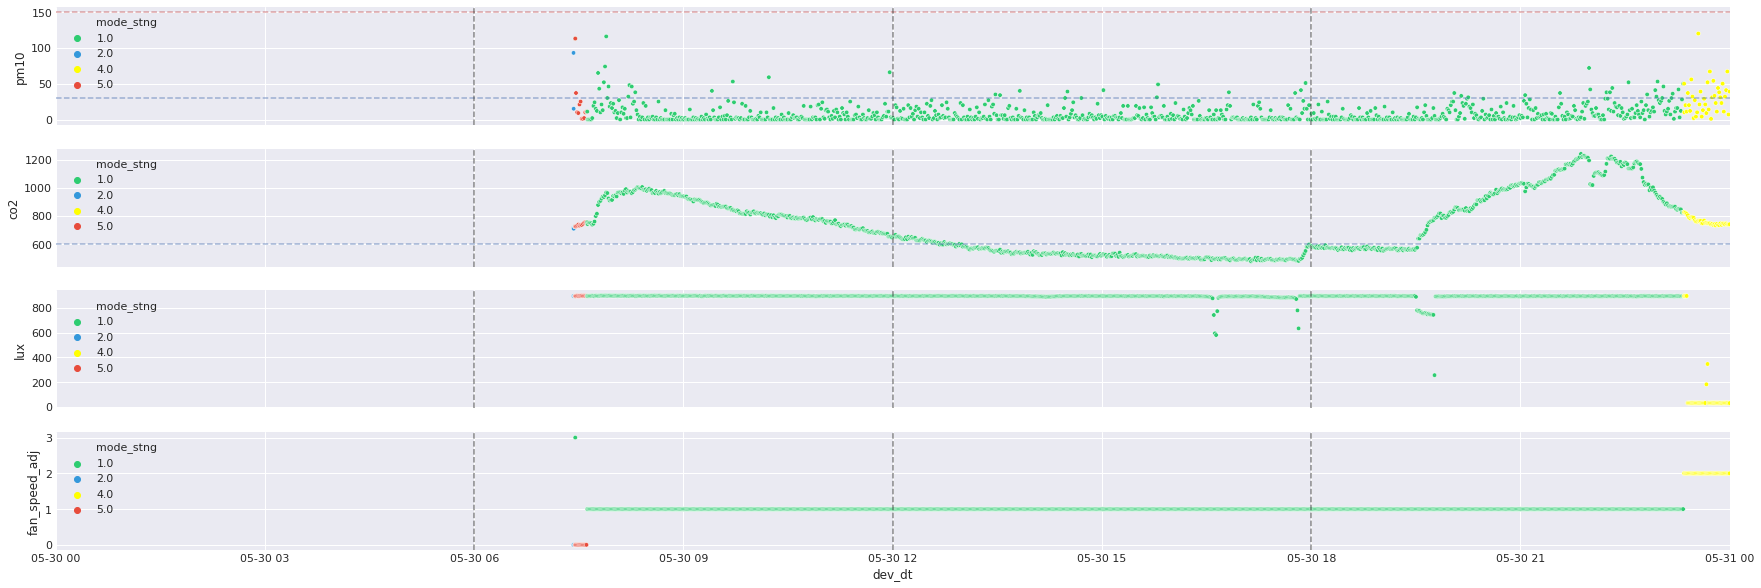

In [242]:
plt.style.use('seaborn-darkgrid')
kws = dict(s=20, linewidth=.5, edgecolor="w")
modes = target_data['mode_stng'].unique()
modes.sort()

fig = plt.figure(figsize=(30,10))
axe01 = plt.subplot2grid((4,4), (0,0), rowspan = 1, colspan = 4)
if len(modes) == 1:
    if np.isnan(modes[0]):
        sns.scatterplot(x="dev_dt", y="pm10", hue="mode_stng", palette=colors[-1], data=target_data, legend='full',**kws)
    else:
        sns.scatterplot(x="dev_dt", y="pm10", hue="mode_stng", palette=colors[int(modes[0])], data=target_data, legend='full',**kws)
else:
    sns.scatterplot(x="dev_dt", y="pm10", hue="mode_stng", palette=[colors[int(n)] for n in modes if not np.isnan(n)], data=target_data, legend='full',**kws)
plt.axhline(30,  color='b', linestyle='--', alpha=0.5)
plt.axhline(150,  color='r', linestyle='--', alpha=0.5)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[2], color='k', linestyle='--', alpha=0.5)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[4], color='k', linestyle='--', alpha=0.5)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[6], color='k', linestyle='--', alpha=0.5)
axe01.xaxis.label.set_visible(False)
axe01.xaxis.set_ticklabels([])
plt.xlim((s_date, e_date))

axe02 = plt.subplot2grid((4,4), (1,0), rowspan = 1, colspan = 4)
if len(modes) == 1:
    if np.isnan(modes[0]):
        sns.scatterplot(x="dev_dt", y="co2", hue="mode_stng", palette=colors[-1], data=target_data, legend='full',**kws)
    else:
        sns.scatterplot(x="dev_dt", y="co2", hue="mode_stng", palette=colors[int(modes[0])], data=target_data, legend='full',**kws)
else:
    sns.scatterplot(x="dev_dt", y="co2", hue="mode_stng", palette=[colors[int(n)] for n in modes if not np.isnan(n)], data=target_data, legend='full',**kws)
plt.axhline(600,  color='b', linestyle='--', alpha=0.5)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[2], color='k', linestyle='--', alpha=0.5)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[4], color='k', linestyle='--', alpha=0.5)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[6], color='k', linestyle='--', alpha=0.5)
axe02.xaxis.label.set_visible(False)
axe02.xaxis.set_ticklabels([])
plt.xlim((s_date, e_date))

axe03 = plt.subplot2grid((4,4), (2,0), rowspan = 1, colspan = 4)
if len(modes) == 1:
    if np.isnan(modes[0]):
        sns.scatterplot(x="dev_dt", y="lux", palette=colors[-1], data=target_data, legend='full',**kws)
    else:
        sns.scatterplot(x="dev_dt", y="lux",  hue="mode_stng", palette=colors[int(modes[0])], data=target_data, legend='full',**kws)
else:
    sns.scatterplot(x="dev_dt", y="lux", hue="mode_stng", palette=[colors[int(n)] for n in modes if not np.isnan(n)], data=target_data, legend='full',**kws)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[2], color='k', linestyle='--', alpha=0.5)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[4], color='k', linestyle='--', alpha=0.5)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[6], color='k', linestyle='--', alpha=0.5)
axe03.xaxis.label.set_visible(False)
axe03.xaxis.set_ticklabels([])
plt.xlim((s_date, e_date))

axe04 = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
if len(modes) == 1:
    if np.isnan(modes[0]):
        sns.scatterplot(x="dev_dt", y="fan_speed_adj", palette=colors[-1], data=target_data, legend='full',**kws)
    else:
        sns.scatterplot(x="dev_dt", y="fan_speed_adj", hue="mode_stng", palette=colors[int(modes[0])], data=target_data, legend='full',**kws)
else:
    sns.scatterplot(x="dev_dt", y="fan_speed_adj", hue="mode_stng", palette=[colors[int(n)] for n in modes if not np.isnan(n)], data=target_data, legend='full',**kws)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[2], color='k', linestyle='--', alpha=0.5)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[4], color='k', linestyle='--', alpha=0.5)
plt.axvline(pd.date_range(s_date, e_date, periods=9).tolist()[6], color='k', linestyle='--', alpha=0.5)
plt.xlim((s_date, e_date))
axe04.set_yticks([0, 1, 2, 3])